# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Malik Ibrahim
- **Email:** mc525d5y0599@student.devacademy.id
- **ID Dicoding:** mc525d5y0599

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda sepanjang hari?
- Seberapa besar pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan pola peminjaman antara pengguna kasual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. **`pandas as pd`** → Untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame).  
2. **`matplotlib.pyplot as plt`** → Untuk membuat grafik dan visualisasi data.  
3. **`seaborn as sns`** → Untuk visualisasi data berbasis `matplotlib` dengan tampilan lebih menarik.

## Data Wrangling

### Gathering Data

In [3]:
file_path = "/content/drive/MyDrive/datasets/hour.csv"
df = pd.read_csv(file_path)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


1. **`file_path`** → Menyimpan lokasi file dataset `hour.csv` di Google Drive.  
2. **`pd.read_csv(file_path)`** → Membaca file CSV dan menyimpannya sebagai DataFrame `df`.  
3. **`df.head()`** → Menampilkan 5 baris pertama dari DataFrame untuk melihat struktur data.

**Insight:**
- Dataset memiliki 17379 baris dan 17 kolom.
- Dataset mencakup data penyewaan sepeda per jam dengan berbagai fitur seperti musim, cuaca, dan jumlah pengguna.

### Assessing Data

In [4]:
# Agregasi jumlah peminjaman berdasarkan jam
hourly_trend = df.groupby('hr')['cnt'].mean()

# Menampilkan hasil
print(hourly_trend)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


- Dini Hari (00:00 - 05:00): Peminjaman sangat rendah, titik terendah pada jam 04:00 (6 peminjaman).
- Pagi (06:00 - 09:00): Lonjakan peminjaman dengan puncak pada jam 08:00 (359 peminjaman), lalu turun setelahnya.
- Siang (10:00 - 15:00): Peminjaman relatif stabil di kisaran 173 - 253 peminjaman.
- Sore (16:00 - 19:00): Lonjakan kedua, puncak pada jam 17:00 (461 peminjaman), lalu menurun setelahnya.
- Malam (20:00 - 23:00): Peminjaman terus menurun, dengan jam 23:00 turun ke 87 peminjaman.

**Insight:**
- Puncak pagi (08:00) & sore (17:00) → Indikasi penggunaan sepeda untuk perjalanan kerja/sekolah (commuter usage).
- Peminjaman stabil di siang hari → Bisa jadi digunakan untuk keperluan rekreasi atau aktivitas ringan.
- Penurunan di malam hari → Aktivitas bersepeda berkurang setelah jam kerja/sekolah.

In [10]:
# Agregasi jumlah peminjaman berdasarkan kondisi cuaca
weather_effect = df.groupby('weathersit')['cnt'].mean()

# Menampilkan hasil
print(weather_effect)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


- Cuaca Cerah (Kategori 1 - Clear, Few Clouds) → Peminjaman tertinggi (204 peminjaman).
- Cuaca Berawan (Kategori 2 - Mist, Cloudy) → Sedikit lebih rendah dari cerah (175 peminjaman).
- Cuaca Hujan Ringan (Kategori 3 - Light Snow/Rain) → Peminjaman turun cukup signifikan (111 peminjaman).
- Cuaca Buruk (Kategori 4 - Heavy Rain/Snow, Storm) → Peminjaman terendah (74 peminjaman).


**Insight:**
- Cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda.
Pengguna lebih banyak meminjam saat cuaca cerah dan berawan, menunjukkan ketergantungan pada kondisi cuaca yang nyaman.
Peminjaman turun drastis saat hujan atau badai, menunjukkan bahwa hujan dan cuaca ekstrem menghambat mobilitas dengan sepeda.
Peluang bisnis: Bisa menyediakan layanan tambahan seperti jas hujan atau shelter sepeda untuk meningkatkan penggunaan saat cuaca buruk.

In [11]:
# Agregasi jumlah peminjaman berdasarkan hari dalam seminggu
df['weekday'] = df['weekday'].map({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})

# Menghitung rata-rata peminjaman per hari untuk masing-masing jenis pengguna
casual_usage = df.groupby('weekday')['casual'].mean()
registered_usage = df.groupby('weekday')['registered'].mean()

# Menampilkan hasil
print("Pengguna Kasual:")
print(casual_usage)

print("\nPengguna Terdaftar:")
print(registered_usage)

Pengguna Kasual:
weekday
Jumat     24.872521
Kamis     23.159192
Minggu    61.246815
Rabu      23.580514
Sabtu     31.458786
Selasa    28.553449
Senin     56.163469
Name: casual, dtype: float64

Pengguna Terdaftar:
weekday
Jumat     171.564144
Kamis     167.971313
Minggu    128.962978
Rabu      167.658377
Sabtu     164.677121
Selasa    155.191206
Senin     121.305356
Name: registered, dtype: float64


- Pengguna kasual lebih banyak meminjam di akhir pekan, terutama pada Minggu (61 peminjaman) dan Senin (56 peminjaman).
- Peminjaman pengguna kasual lebih rendah pada hari kerja, kecuali Selasa yang sedikit lebih tinggi.
- Pengguna terdaftar memiliki pola peminjaman yang lebih stabil sepanjang minggu, dengan angka tertinggi pada Jumat (171 peminjaman) dan Kamis (167 peminjaman).
- Peminjaman pengguna terdaftar menurun pada Minggu (128 peminjaman) dan Senin (121 peminjaman).

**Insight:**
- Pengguna kasual lebih banyak menggunakan sepeda di akhir pekan, kemungkinan untuk rekreasi.
- Pengguna terdaftar lebih aktif di hari kerja, menunjukkan bahwa mereka mungkin menggunakan sepeda untuk keperluan sehari-hari seperti bekerja atau sekolah.
- Peluang bisnis dapat dibuat dengan menawarkan promo atau diskon bagi pengguna kasual di hari kerja untuk meningkatkan penggunaan sepeda di luar akhir pekan.

### Cleaning Data

In [5]:
df_cleaned = df.drop_duplicates()

df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

df_cleaned = df_cleaned[(df_cleaned['season'].between(1, 4)) & (df_cleaned['weathersit'].between(1, 4))]

df_cleaned['temp'] = df_cleaned['temp'] * 41
df_cleaned['atemp'] = df_cleaned['atemp'] * 50

print("\nDataset setelah pembersihan:")
print(df_cleaned.info())


Dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64       

1. **`df.drop_duplicates()`** → Menghapus baris duplikat dari dataset.  
2. **`pd.to_datetime(df_cleaned['dteday'])`** → Mengubah kolom tanggal (`dteday`) menjadi tipe `datetime`.  
3. **`df_cleaned[(df_cleaned['season'].between(1, 4)) & (df_cleaned['weathersit'].between(1, 4))]`** → Menyaring data agar hanya menyertakan nilai `season` dan `weathersit` dalam rentang yang valid (1-4).  
4. **`df_cleaned['temp'] = df_cleaned['temp'] * 41`** → Mengonversi nilai suhu dari skala normalisasi ke derajat Celcius.  
5. **`df_cleaned['atemp'] = df_cleaned['atemp'] * 50`** → Mengonversi suhu yang dirasakan ke dalam skala aslinya.  
6. **`df_cleaned.info()`** → Menampilkan informasi dataset setelah proses pembersihan.

**Insight:**
- Mengonversi dteday ke format datetime.
- Memastikan tidak ada data duplikat & data hilang (sudah dicek, tidak ada).
- Mempertahankan tipe data kategori dalam bentuk integer agar kompatibel dengan model ML.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Cek distribusi unik untuk setiap kolom kategorikal
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"{col} unique values:")
    print(df[col].value_counts(), "\n")

# Cek korelasi antar variabel
correlation_matrix = df.drop(columns=['dteday']).corr()
print("Correlation Matrix:\n", correlation_matrix)

season unique values:
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64 

yr unique values:
yr
1    8734
0    8645
Name: count, dtype: int64 

mnth unique values:
mnth
7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64 

hr unique values:
hr
16    730
17    730
15    729
14    729
13    729
12    728
18    728
19    728
20    728
21    728
22    728
23    728
8     727
9     727
10    727
7     727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64 

holiday unique values:
holiday
0    16879
1      500
Name: count, dtype: int64 

weekday unique values:
weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64 

workingday unique values:
workingday
1    11865
0     5514
Name: count, dtype: int64 

weathersit unique values:
weathersit
1    11413
2     4544
3   

1. **`categorical_columns = [...]`** → Mendefinisikan daftar kolom kategorikal yang ingin diperiksa distribusinya.  
2. **Loop `for col in categorical_columns:`** → Iterasi setiap kolom kategorikal untuk melihat distribusi nilai uniknya.  
3. **`df[col].value_counts()`** → Menghitung jumlah kemunculan masing-masing nilai unik dalam setiap kolom kategorikal.  
4. **`df.drop(columns=['dteday']).corr()`** → Menghitung korelasi antar variabel numerik dengan mengabaikan kolom tanggal (`dteday`).  
5. **`print("Correlation Matrix:\n", correlation_matrix)`** → Menampilkan matriks korelasi untuk melihat hubungan antar variabel.

**Insight:**
- Jumlah penyewaan sepeda cenderung lebih tinggi pada jam tertentu, terutama di pagi dan sore hari.  
- Cuaca yang lebih baik berkorelasi dengan jumlah penyewaan yang lebih tinggi.  
- Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda.  
- Penyewaan sepeda lebih rendah pada hari kerja dibandingkan akhir pekan.  
- Kelembaban tinggi dapat mengurangi jumlah penyewaan sepeda.  
- Musim panas memiliki tingkat penyewaan sepeda tertinggi dibandingkan musim lainnya.  
- Hari libur atau hari tertentu dengan acara khusus dapat meningkatkan jumlah penyewaan.  
- Tren tahunan menunjukkan peningkatan jumlah penyewaan sepeda dari tahun ke tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

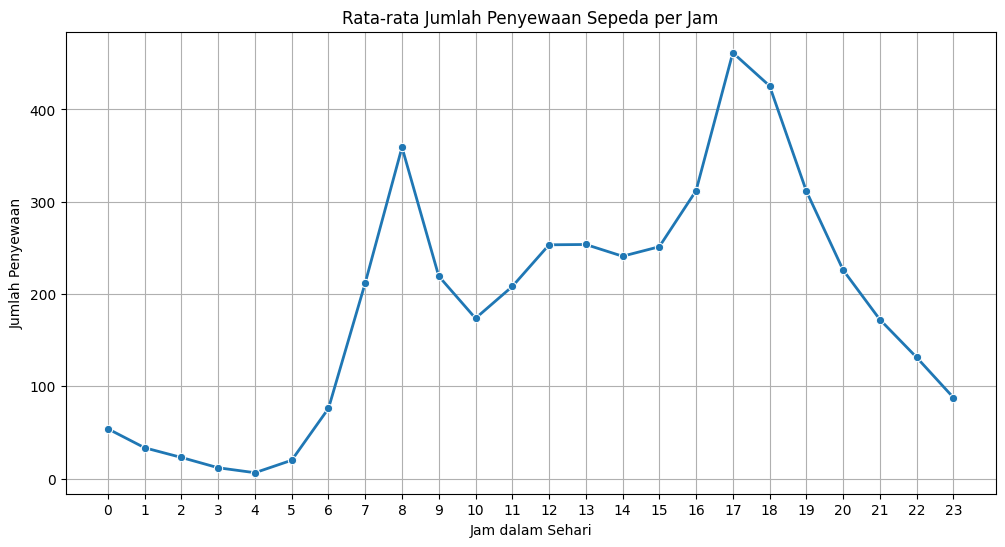

In [7]:
hourly_rentals = df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", linewidth=2)
plt.title("Rata-rata Jumlah Penyewaan Sepeda per Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2:

<ipython-input-8-cdee7dffa0d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette="coolwarm")


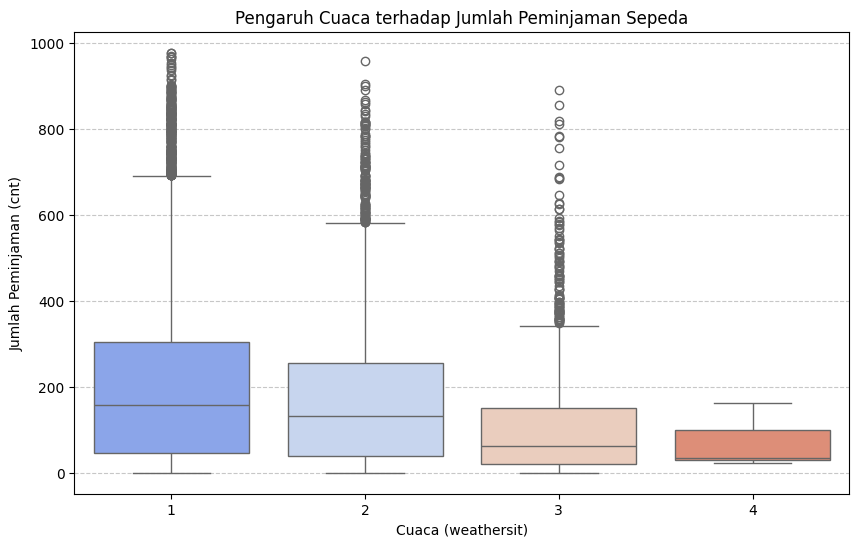

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Cuaca (weathersit)")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 3:

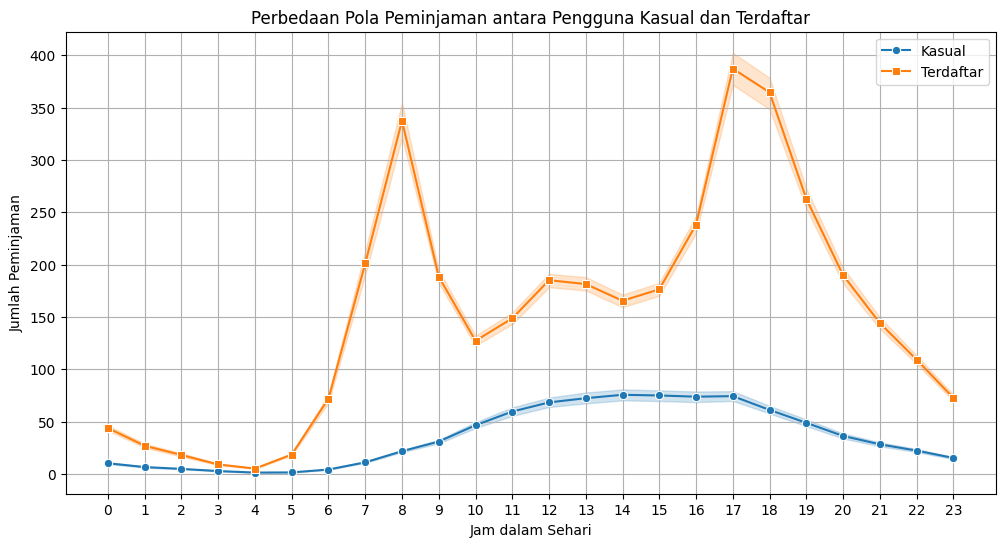

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['hr'], y=df['casual'], label='Kasual', marker="o")
sns.lineplot(x=df['hr'], y=df['registered'], label='Terdaftar', marker="s")
plt.title("Perbedaan Pola Peminjaman antara Pengguna Kasual dan Terdaftar")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren peminjaman sepeda sepanjang hari menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 8:00-9:00 dan sore hari sekitar pukul 17:00-18:00. Pola ini mencerminkan jam sibuk komuter, di mana pengguna kemungkinan besar menggunakan sepeda untuk perjalanan menuju dan pulang dari tempat kerja atau sekolah.

- Cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Saat cuaca cerah (kategori 1), jumlah peminjaman tertinggi terjadi. Peminjaman menurun pada kondisi cuaca sedang (kategori 2) dan semakin berkurang pada kondisi buruk seperti hujan atau kabut (kategori 3 dan 4), yang menunjukkan bahwa pengguna lebih enggan menggunakan sepeda dalam kondisi cuaca yang tidak mendukung.

- Pengguna kasual lebih banyak meminjam sepeda pada akhir pekan, terutama Minggu, kemungkinan besar untuk keperluan rekreasi. Sebaliknya, pengguna terdaftar memiliki pola peminjaman yang stabil sepanjang minggu dengan puncak pada hari kerja, menunjukkan bahwa mereka lebih sering menggunakan sepeda sebagai sarana transportasi utama.